Observations and Insights:
 
1. The effectiveness of Capomulin is comparable to Ramicane, and it is more effective than Infubinol and Ceftamine based on the box plots of the final tumor volumes.

2. The results of the study is reliable as there is only 1 outlier in the data set for the top drugs, and none for Capomulin.

3. The effectiveness of the drugs is related to mouse weight. The heavier the mouse, the less effective the drug is (see scatter plot). Also, we see strong r-value correlation (0.83) resulting from the linear regression.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_total_1=combined_data.groupby(by=["Mouse ID"]).count()
mice_total=len(combined_data['Mouse ID'])
mice_total_u=len(combined_data["Mouse ID"].unique())
mice_total_u


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])
# print(duplicate)
duplicate_miceid=combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(duplicate_miceid)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data=combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Print cleandata without duplicate mouse ID
clean_data=combined_data.loc[combined_data["Mouse ID"] !="g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count=clean_data.groupby(by=["Mouse ID"])
clean_count=len(clean_count["Mouse ID"])
clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_1=clean_data.groupby(by=["Drug Regimen"])
mean_1=summary_1.mean()["Tumor Volume (mm3)"]
median_1=summary_1.median() ["Tumor Volume (mm3)"]
var_1=summary_1.var() ["Tumor Volume (mm3)"]
std_1=summary_1.std()["Tumor Volume (mm3)"]
sem_1=summary_1.sem() ["Tumor Volume (mm3)"]

summary_df=pd.DataFrame({"Mean Tumor Volume": mean_1, "Median Tumor Volume": median_1, 
                        "Tumor Volume Variance": var_1, "Tumor Volume Std. Dev.": std_1,
                        "Tumor Volume Std. Err.": sem_1})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation=summary_1.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregation


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

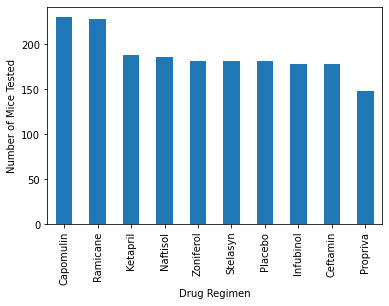

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pandas_bar=clean_data["Drug Regimen"].value_counts()

pandas_bar.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()



<BarContainer object of 10 artists>

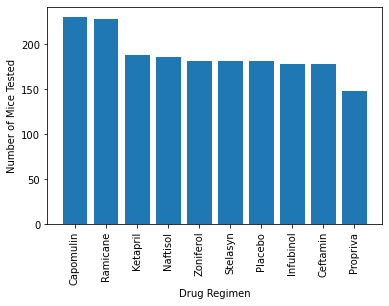

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y=clean_data["Drug Regimen"].value_counts()


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.bar(y.index.values,y.values)



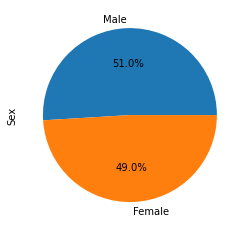

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie= clean_data["Sex"].value_counts()
pandas_pie.plot(kind="pie", autopct="%1.1f%%")
plt.show()


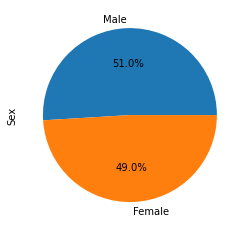

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pp = clean_data["Sex"].value_counts()
labels=["Male", "Female"]
plt.ylabel("Sex")
plt.pie(pp,labels=labels, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index() 
                            

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_data=last_timepoint.merge(clean_data,on=["Mouse ID","Timepoint"],how="left")


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol =[]
   
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:

    final_vol = merge_data.loc[merge_data["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]

    tumor_vol.append(final_vol)
    
  # Determine outliers using upper and lower bounds
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
#     print(f'IQR for {treatment}: {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f'Lower Bound for {treatment}: {lower_bound}')
#     print(f'Upper Bound for {treatment}: {upper_bound}')


    outliers_count = final_vol.loc[(final_vol > upper_bound ) | (final_vol < lower_bound)]
    print(f'{treatment} potential outliers: {outliers_count}')


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


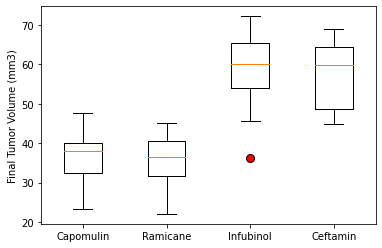

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(tumor_vol, flierprops=flierprops)

plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

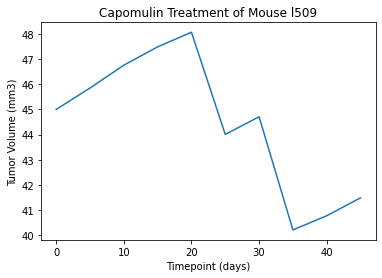

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# use mouse l509
mouse = clean_data.loc[clean_data['Mouse ID'] == 'l509']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()


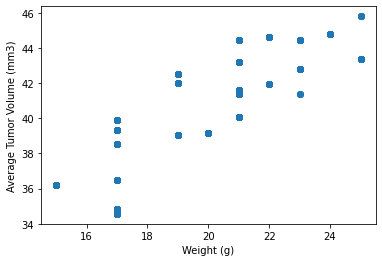

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_combined= pd.merge(capomulin, avg_tumor_vol, on='Mouse ID')
x = avg_vol_combined['Weight (g)']
y = avg_vol_combined['avg_tumor_vol']

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(x, y)
plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.83


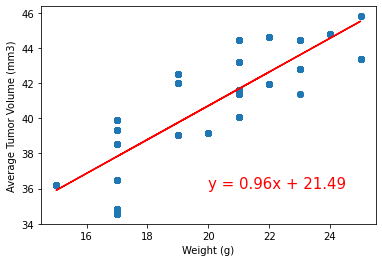

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
